#Intialise dataframe# 

In [6]:
import csv
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


def read_activity_data():
    with open(r"D:\shark-doo-doo\data\activityDat.csv") as file:
        data = list(csv.reader(file))
        df = pd.DataFrame(data[1:], columns=data[0])
        df.columns = ['Year', 'Status', 'Provocation', 'Activity']
        print(df.head())
        return df


def read_injury_data():
    with open(r"D:\shark-doo-doo\data\injurydat.csv") as file:
        data = list(csv.reader(file))
        df = pd.DataFrame(data[1:], columns=data[0])
        df.columns = ['Day', 'Month', 'Year', 'Injury', 'State', 'Location', 'Latitude', 'Longitude', 'SharkName',
                      'SharkLength', 'Provocation', 'SharksCount', 'Activity', 'InjuryLocation', 'Severity', 'Gender',
                      'Age', 'IncidentTime']
        print(df.head())
        return df

def read_timedb2_data():
    with open(r"D:\shark-doo-doo\data\timedb2.csv") as file:
        data = list(csv.reader(file))
        df = pd.DataFrame(data[1:], columns=data[0])
        df.columns = ['Day', 'Month', 'Year', 'Latitude', 'Longitude', 'SharkName', 'SharkScientific',
                      'Provocation', 'Activity', 'InjuryLocation', 'InjuryDescription', 'Severity',
                      'Gender', 'Age', 'IncidentTime']
        print(df.head())
        return df


df_act = read_activity_data()
df_inj = read_injury_data()
df_time = read_timedb2_data()


   Year   Status Provocation  Activity
0  1791    fatal  unprovoked  swimming
1  1803  injured  unprovoked  swimming
2  1807  injured  unprovoked  swimming
3  1820    fatal    provoked  swimming
4  1825  injured  unprovoked  swimming
  Day Month  Year   Injury State                           Location  \
0   1     1  1791    fatal   NSW                        near sydney   
1  22     3  1803  injured    WA        "hamelin bay, faure island"   
2  18     1  1807  injured   NSW       "cockle bay, sydney harbour"   
3   1     1  1820    fatal   TAS     "sweetwater point, pitt water"   
4   1     1  1825  injured   NSW  "kirribili point, sydney harbour"   

       Latitude    Longitude    SharkName SharkLength Provocation SharksCount  \
0  -33.86666667        151.2  white shark              unprovoked               
1  -25.83333333  113.8833333  tiger shark              unprovoked           1   
2  -33.86666667        151.2   bull shark              unprovoked           1   
3         -42.8

Missing values

In [7]:
total_missing = df_act.isna().sum().sum()
print(total_missing, 'missing values for df_act')
total_missing = df_inj.isna().sum().sum()
print(total_missing, 'missing values for df_inj')
total_missing = df_time.isna().sum().sum()
print(total_missing, 'missing values for df_time')

0 missing values for df_act
0 missing values for df_inj
0 missing values for df_time


Text(0, 0.5, 'Frequency')

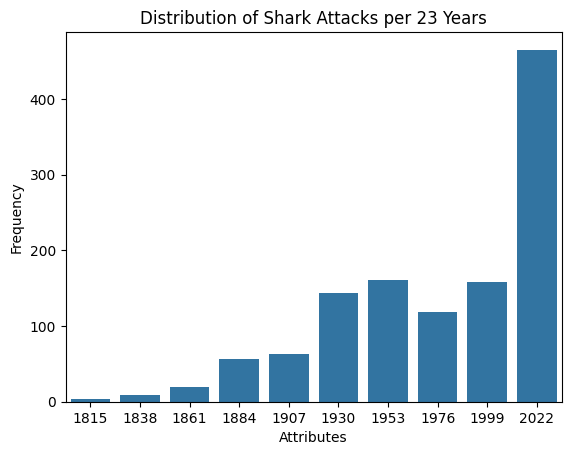

In [8]:
def Bins(df, attribute:str):
    min_year = float(df[attribute].min())
    max_year = float(df[attribute].max())
    num_bins = 10
    bin_size= (max_year-min_year)/num_bins
    bins = [0]*num_bins
    counter = 0
    current_year = min_year
    frequency = [0]*num_bins

    while counter < num_bins:
        current_year = current_year+bin_size
        bins[counter] = math.ceil(current_year)
        counter +=1

    for year in df_act['Year']:
        year = int(year)
        for value in bins:
            if year <= value:
                frequency[bins.index(value)]+=1
                break

    return bins,frequency

bins,frequency = Bins(df = df_act, attribute='Year')
data = pd.DataFrame({"Attributes": bins, "Frequency": frequency})

# Plot using seaborn
sns.barplot(x="Attributes", y="Frequency", data=data)

# Add labels and title
plt.title("Distribution of Shark Attacks per 23 Years")
plt.xlabel("Attributes")
plt.ylabel("Frequency")
#modified_labels = ["1791-1815", "1815-1838", "1838-1861","1861-1884", "1884-1907", "1907-1930", '1930-1953','1953-1976','1976-1999','1999-2022']
#plt.xticks(ticks=range(len(bins)), labels=modified_labels)

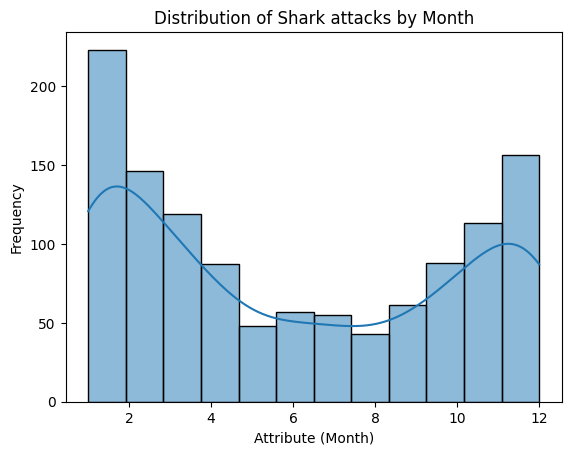

In [9]:
# Convert the 'Month' column to numeric (if not already)
df_inj["Month"] = pd.to_numeric(df_inj["Month"])

# Sort the DataFrame by 'Month'
df_inj_sorted = df_inj.sort_values(by="Month")

# Plot the distribution
sns.histplot(df_inj_sorted["Month"], kde=True, bins=12)
plt.title("Distribution of Shark attacks by Month")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()


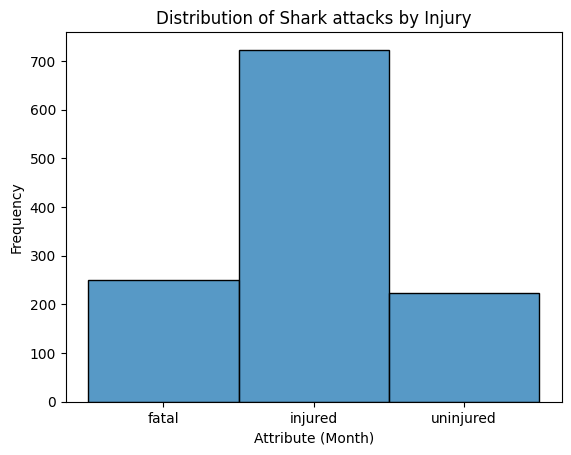

In [10]:
sns.histplot(df_inj_sorted["Injury"], bins=12)
plt.title("Distribution of Shark attacks by Injury")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()

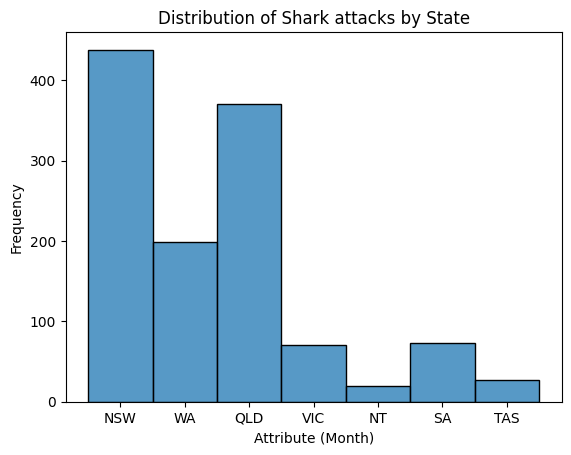

In [11]:
sns.histplot(df_inj_sorted["State"], bins=12)
plt.title("Distribution of Shark attacks by State")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()

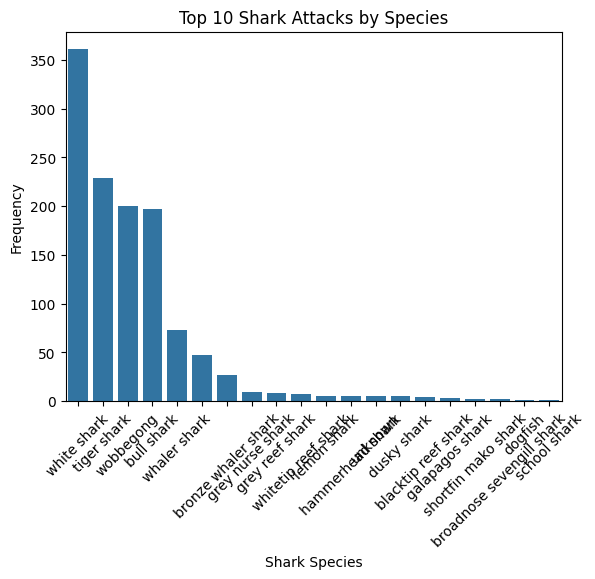

SharkName
white shark                  361
tiger shark                  229
wobbegong                    200
bull shark                   197
whaler shark                  73
                              47
bronze whaler shark           27
grey nurse shark               9
grey reef shark                8
whitetip reef shark            7
lemon shark                    5
hammerhead shark               5
unknown                        5
dusky shark                    5
blacktip reef shark            4
galapagos shark                3
shortfin mako shark            2
broadnose sevengill shark      2
dogfish                        1
school shark                   1
Name: count, dtype: int64

In [12]:
# Aggregate the frequency of each SharkName
top_20_sharks = df_inj_sorted["SharkName"].value_counts().nlargest(20)

# Plot the distribution of the top 10 categories
sns.barplot(x=top_20_sharks.index, y=top_20_sharks.values)

# Add title and labels
plt.title("Top 10 Shark Attacks by Species")
plt.xlabel("Shark Species")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

top_20_sharks
# we have 47 attacks from unkown shark!

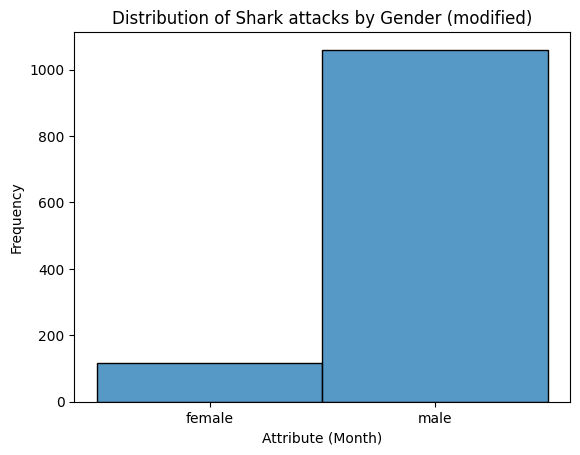

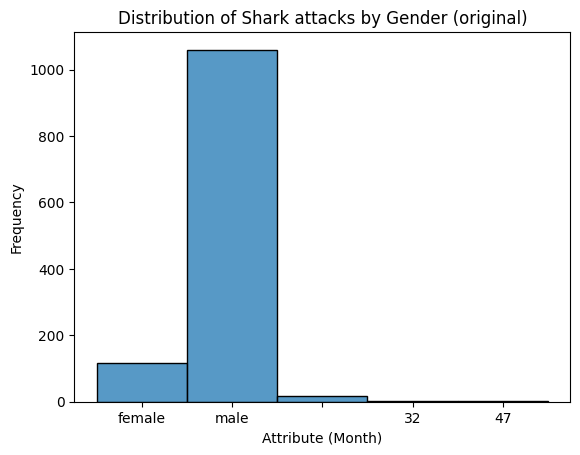

,Day,Month,Year,Injury,State,Location,Latitude,Longitude,SharkName,SharkLength,Provocation,SharksCount,Activity,InjuryLocation,Severity,Gender,Age,IncidentTime
1063,11,6,2017,uninjured,WA,"""casuarina point, bunbury""",-33.3146,115.635,white shark,4.0,unprovoked,1,boarding,,,,,
1065,10,9,2017,injured,NSW,main beach illuka,-29.59387,153.3322,white shark,,unprovoked,,boarding,,,,,
1096,15,11,2018,uninjured,QLD,"""moffat beach, sunshine coast""",-26.791,153.139,tiger shark,,unprovoked,1,,,,,,
1100,9,12,2018,injured,NSW,"""the bar, nambucca river entrance""",-30.643181,153.008839,,,unprovoked,,,,,,,
1105,11,2,2019,injured,NT,umbakumba - 12 km out to sea,-13.8611,136.8116,whitetip reef shark,,provoked,1,,,,,,
1111,5,6,2019,injured,NSW,lennox point,-28.7999,153.58,whaler shark,,unprovoked,1,,,,,,
1116,2,9,2019,injured,NSW,surf beach kiama,-34.6817,150.8511,,,unprovoked,,,,,,,
1123,7,12,2019,injured,WA,exmouth boat harbour,-20.3441,114.143,,,,,,,,,,
1126,5,1,2020,fatal,WA,"""cull island, esperance""",-33.9222,121.9032,white shark,,unprovoked,,diving,,,,,
1127,1,1,2020,uninjured,NSW,"""gallows beach, coffs harbour""",-30.3119,153.1427,bull shark,,unprovoked,,boarding,,,,,


In [16]:
# Keep only rows where 'Gender' is 'male' or 'female'
df_inj_changed = df_inj[df_inj["Gender"].isin(["male", "female"])]

sns.histplot(df_inj_changed["Gender"], bins=12)
plt.title("Distribution of Shark attacks by Gender (modified)")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()


sns.histplot(df_inj["Gender"], bins=12)
plt.title("Distribution of Shark attacks by Gender (original)")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()
df_inj[df_inj['Gender'] == ""]
# we have some data that is MISSING gender